## Assignment 2.3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [8]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [10]:
%%capture
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('Data/output/newyork_data.csv')

In [13]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [14]:
df.drop(columns = {'_merge'}, inplace = True)

In [15]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [16]:
df.shape

(12000000, 15)

In [17]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Basic plotting with pandas

In [21]:
df_temp = df.set_index('date')

In [22]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


In [23]:
# sorting the date in sequence
df_temp=df_temp.sort_index()
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN
2021-04-30,8AFBCFEE21703C2D,classic_bike,2021-04-30 16:56:21.003,2022-03-08 17:18:57.580,Bedford Ave & Nassau Ave,5550.05,Lorimer St & Broadway,4965.01,40.723117,-73.952123,40.704118,-73.948186,casual,NaN
2021-07-10,BA13AC6CD2C65E88,classic_bike,2021-07-10 14:53:21.751,2022-09-09 21:21:15.210,E Tremont Ave & E 176 St,8356.02,Popham Ave & W 174 St,8348.02,40.847798,-73.901883,40.847746,-73.922079,casual,NaN
2021-07-22,2F298092D779509A,classic_bike,2021-07-22 11:49:56.126,2022-01-21 13:15:37.645,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,NaN


In [24]:
df_temp=df_temp[df_temp.index.year>2021]

<Axes: xlabel='date'>

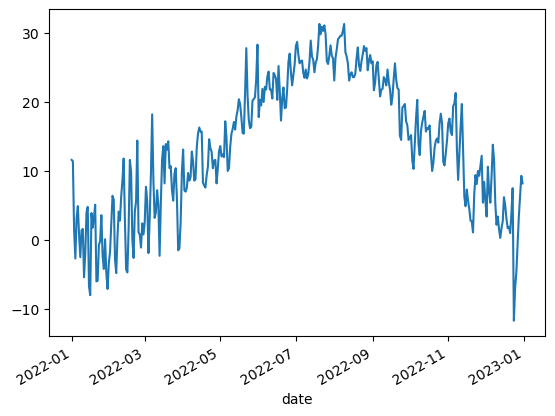

In [25]:
df_temp['avgTemp'].plot()

### Procedural approach

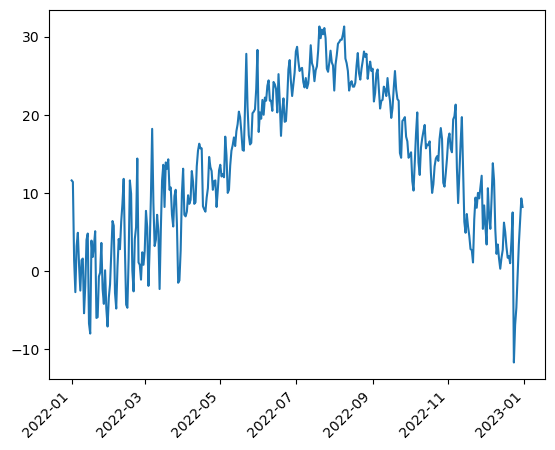

In [27]:
plt.plot(df_temp['avgTemp'])
plt.xticks(rotation=45, ha='right')  # 'ha' means horizontal alignment
plt.show()

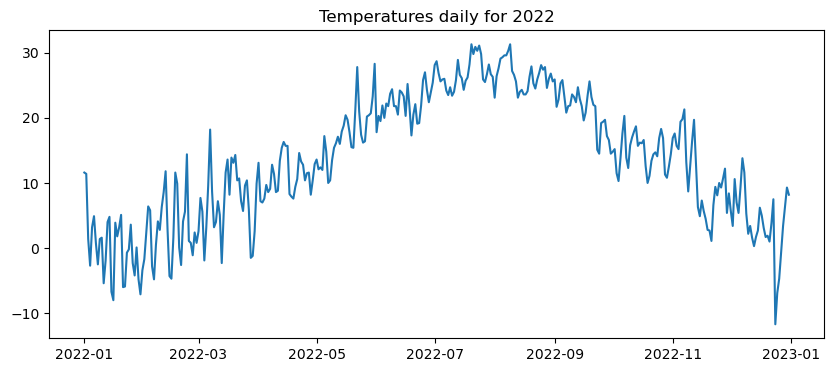

In [42]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

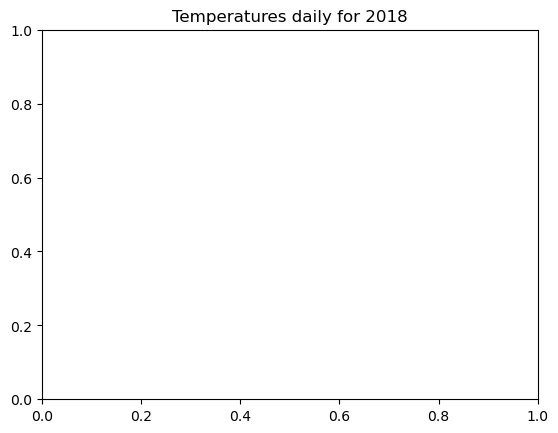

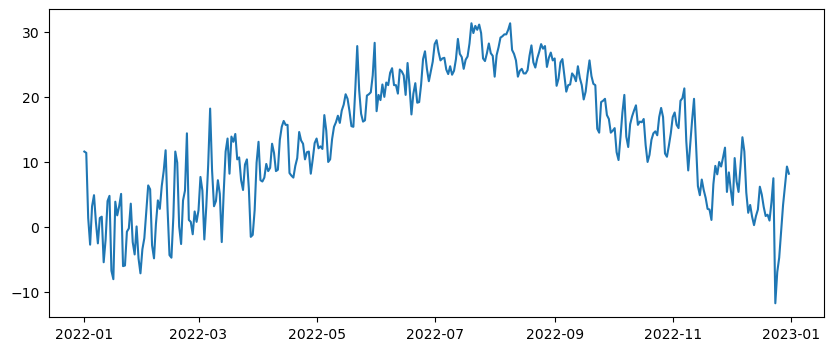

In [44]:
plt.title('Temperatures daily for 2018')
plt.figure(figsize=(10,4))
plt.plot(df_temp['avgTemp'])
plt.show()

### Aggregate trips 

In [47]:
print(df_temp.columns)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')


In [49]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [51]:
df_group.head()

,date,ride_id
0,2021-01-30,1
1,2021-02-15,1
2,2021-04-30,1
3,2021-07-10,1
4,2021-07-22,1


In [53]:
df_group.tail()

,date,ride_id
389,2022-12-27,20903
390,2022-12-28,27658
391,2022-12-29,32880
392,2022-12-30,39522
393,2022-12-31,19812


In [55]:
df_group.shape

(394, 2)

In [57]:
# Rename column in df_group
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

# Perform merge with a custom indicator column name
df = df.merge(df_group, on="date", how="outer", indicator="merge_status")

# Print the count of merge statuses
print(df['merge_status'].value_counts(dropna=False))

# Check the shape of specific dates
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape)
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape)



merge_status
both          12000000
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (19905, 17)
Shape of January 2nd is (41920, 17)


In [101]:
df_group.head()

,date,bike_rides_daily
0,2021-01-30,1
1,2021-02-15,1
2,2021-04-30,1
3,2021-07-10,1
4,2021-07-22,1


In [105]:
# Set 'date' as the index
df_temp = df.set_index('date')

# Print column names of df_temp
print(df_temp.columns)
df_temp=df_temp[df_temp.index.year>2021]
df_temp.head()

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', 'merge_status'],
      dtype='object')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,merge_status
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,19905,both
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,19905,both
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,19905,both
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,19905,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,19905,both


In [106]:
# sort index (date)
df_temp=df_temp.sort_index()
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,merge_status
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,19905,both
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,19905,both
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,19905,both
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,19905,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,19905,both


### As a strategic approach, since the data is too big, every second month of the each quarter's first trip data taken into account. Therfore seeing flat lines between the time periods are normal.

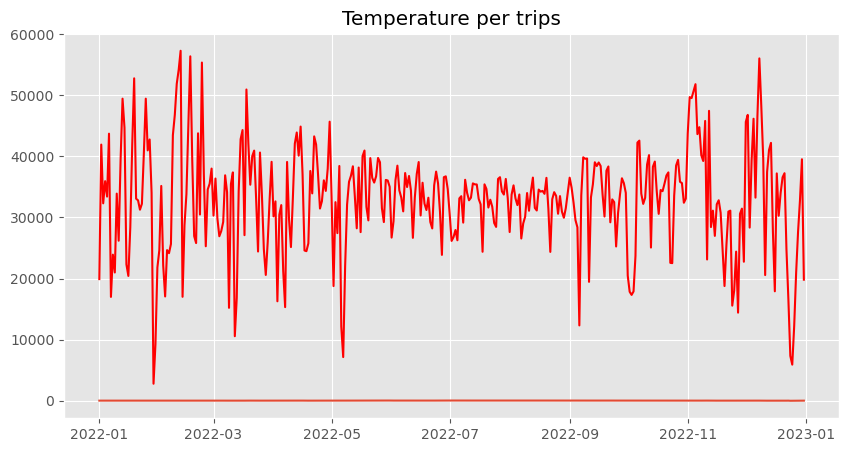

In [108]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

### OO approach

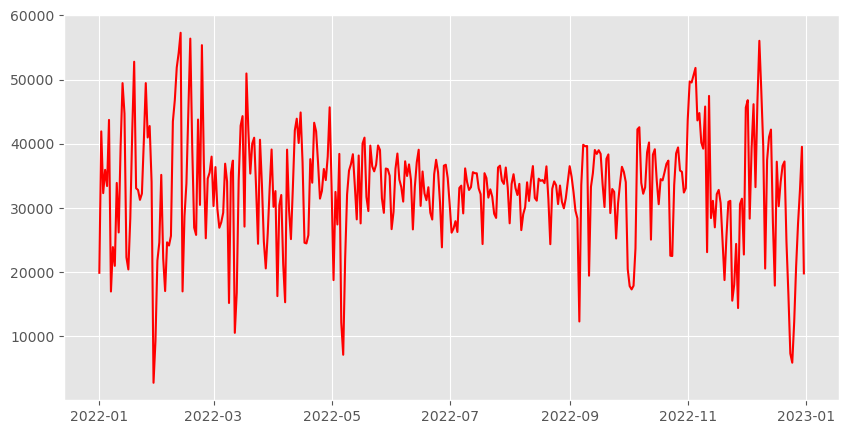

In [110]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

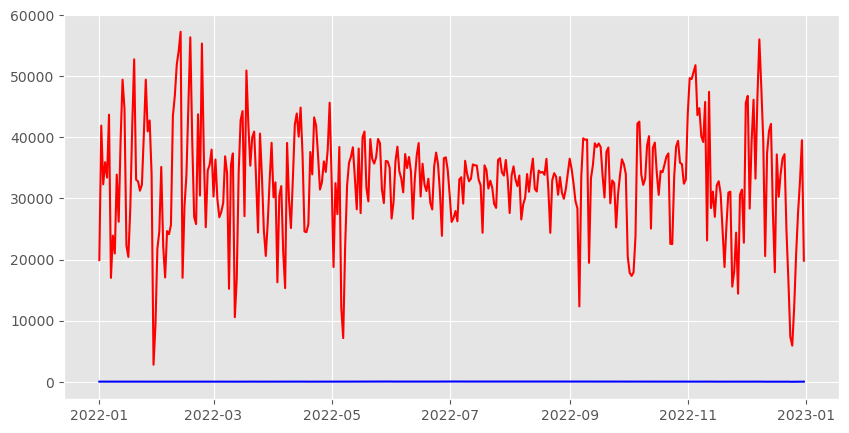

In [111]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")
ax.plot(df_temp['avgTemp'], color = 'blue')

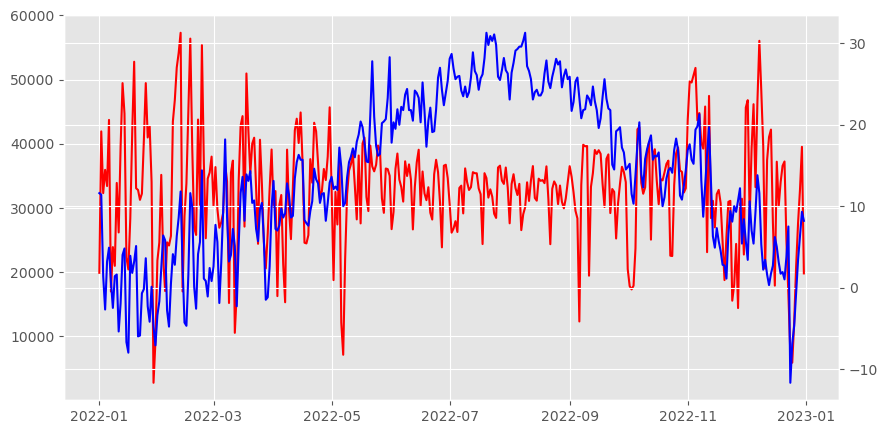

In [112]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

#### Final dual plot

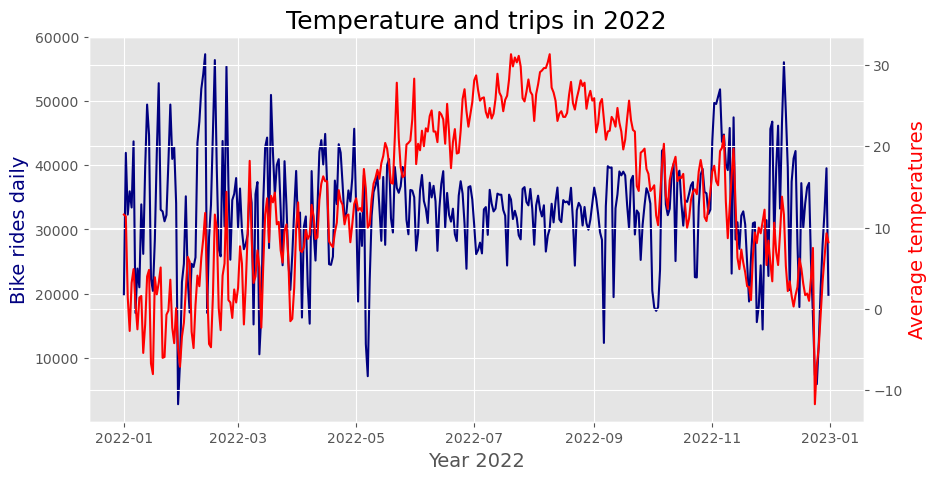

In [114]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### Final line chart with dual axes. The red line represents the temperature in New York in 2022, and the blue line represents the number of bike rides taken during the year. As a strategic approach, since the data is too big, every second month of the each quarter's first trip data taken into account. Therfore seeing flat lines between the time periods are normal.

In [116]:
plt.style.use('ggplot')

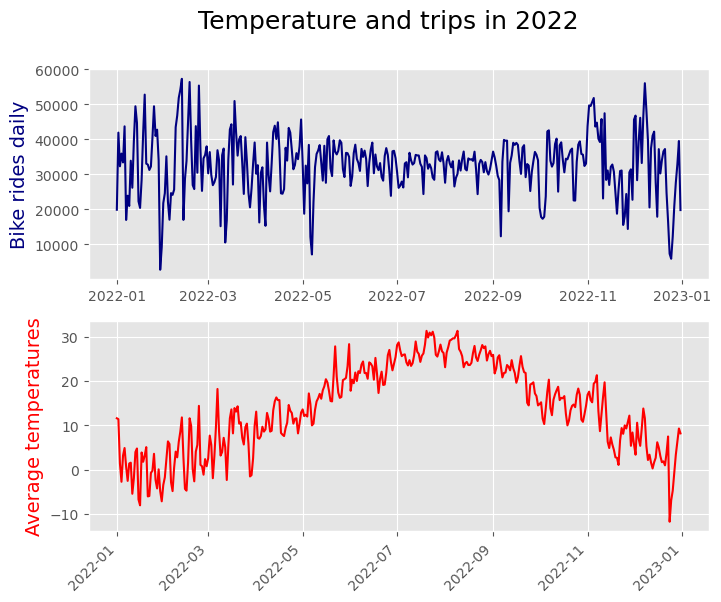

In [117]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)
plt.xticks(rotation=45, ha='right')  # 'ha' means horizontal alignment

plt.show()

In [118]:
# save the plot as a file
fig.savefig('Visualizations/trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
